# TP1b - Génération de variables aléatoires (Deuxième partie)

## Estimation avancée - G3 SDIA

Dans ce TP, on continue de s'intéresser à la génération de variables aléatoires. Ce TP se concentre sur la méthode acceptation-rejet, l'estimation de Monte Carlo, et l'échantillonnage d'importance.

### Instructions

1. Renommer votre notebook sous la forme `tp1a_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 26 Novembre 2023, 23h59.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta, norm, gamma, multivariate_normal
import math

### Partie 1 - Acceptation-Rejet (*Rejection sampling*)

NB : Toujours comparer les distributions empiriques obtenues aux densités théoriques à l'aide d'histogrammes ou de *kernel density estimates*.

**Q1 - Loi Bêta**. On considère la loi Bêta, dont la densité sur $[0,1]$ est
$$f(x;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1} \quad \alpha > 0, \quad \beta > 0.$$

On souhaite obtenir des échantillons de la loi Bêta dans le cas suivant : $\alpha = 2, \beta = 2$.
* Expiquer pourquoi il est difficile de mettre en place la méthode de la transformée inverse.
* Quelle loi très simple peut-on utiliser comme loi instrumentale ?
* Implémenter alors un algorithme acceptation-rejet pour obtenir $N = 10000$ échantillons.
* Comparer la proportion empirique d'échantillons acceptés avec sa valeur théorique.
* Quelle difficulté rencontre-t-on pour le cas $\alpha = 0.5, \beta = 0.5$ ?

Il est difficile de mettre en place la méthode de la transformé inverse car on ne connait pas l'expression explicite de la fonction générale inverse de la loi Bêta. 
On peut utiliser une loi normal centré avec une variance adapté

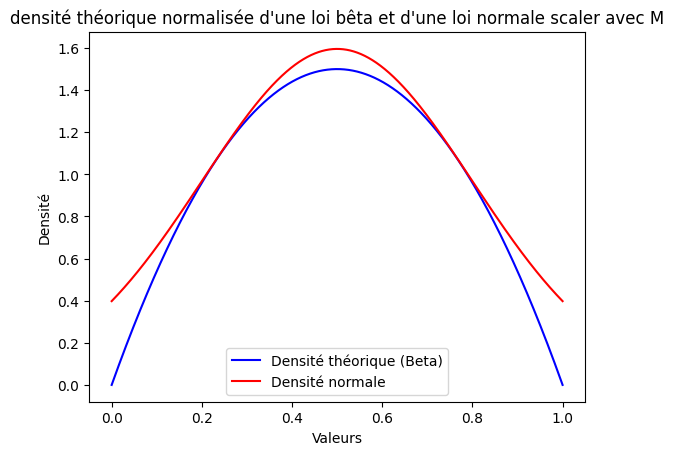

In [2]:
# Paramètres de la loi bêta
alpha = 2
beta_val = 2

x = np.linspace(0, 1, 10000) 

theoretical_density_beta = beta.pdf(x, alpha, beta_val)

mean, std_dev = 0.5, 0.3
normal_density = norm.pdf(x, mean, std_dev)

#M = np.trapz(normalized_density_beta, x)/np.trapz(normal_density, x)
M = 1.2

# Tracé de la densité théorique de la loi bêta
plt.plot(x, theoretical_density_beta, color='blue', label='Densité théorique (Beta)')
plt.plot(x, M*normal_density, color='red', label='Densité normale')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.title('densité théorique normalisée d\'une loi bêta et d\'une loi normale scaler avec M')
plt.legend()
plt.show()


In [3]:
N = 10000

# Algorithme d'acceptation-rejet
accepted_samples = []
n_tot = 0
n_accepted = 0
while n_accepted < (N):
    # Étape 1: Générer un échantillon x0 à partir de la distribution auxiliaire q(x)
    x0 = np.random.normal(mean, std_dev)
    # Étape 2: Générer un échantillon u à partir d'une distribution uniforme [0, M * q(x0)]
    u = np.random.uniform(0, M * norm.pdf(x0, mean, std_dev))

    # Étape 3: Vérifier si u < p˜(x0)
    if u < beta.pdf(x0, alpha, beta_val):
        # Étape 4: Accepter l'échantillon x0
        accepted_samples.append(x0)
        n_accepted += 1
    n_tot += 1

print(f'Proportion de sample acceptés: {np.round(n_accepted/n_tot*100,2)} %')
print(f'Proportion théorique de sample acceptés: {np.round(1/M,2)*100} %')

Proportion de sample acceptés: 83.17 %
Proportion théorique de sample acceptés: 83.0 %


La proportion empirique de samples acceptés respectent bien la théorie

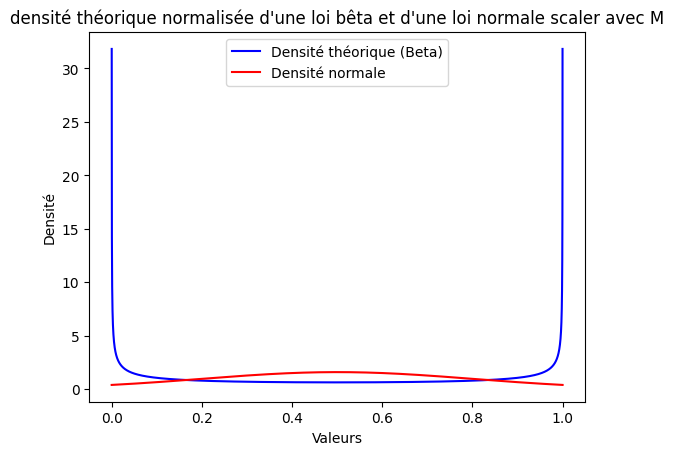

In [4]:
# Paramètres de la loi bêta
alpha = 0.5
beta_val = 0.5

x = np.linspace(0, 1, 10000) 

theoretical_density_beta = beta.pdf(x, alpha, beta_val)

mean, std_dev = 0.5, 0.3
normal_density = norm.pdf(x, mean, std_dev)

#M = np.trapz(normalized_density_beta, x)/np.trapz(normal_density, x)
M = 1.2

# Tracé de la densité théorique de la loi bêta
plt.plot(x, theoretical_density_beta, color='blue', label='Densité théorique (Beta)')
plt.plot(x, M*normal_density, color='red', label='Densité normale')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.title('densité théorique normalisée d\'une loi bêta et d\'une loi normale scaler avec M')
plt.legend()
plt.show()


In [5]:
N = 10000

# Algorithme d'acceptation-rejet
accepted_samples = []
n_tot = 0
n_accepted = 0
while n_accepted < (N):
    # Étape 1: Générer un échantillon x0 à partir de la distribution auxiliaire q(x)
    x0 = np.random.normal(mean, std_dev)
    # Étape 2: Générer un échantillon u à partir d'une distribution uniforme [0, M * q(x0)]
    u = np.random.uniform(0, M * norm.pdf(x0, mean, std_dev))

    # Étape 3: Vérifier si u < p˜(x0)
    if u < beta.pdf(x0, 0.5, 0.5):
        # Étape 4: Accepter l'échantillon x0
        accepted_samples.append(x0)
        n_accepted += 1
    n_tot += 1

print(f'Proportion de sample acceptés: {np.round(n_accepted/n_tot*100, 2)} %')
print(f'Proportion empirique de sample acceptés: {np.round(1/M,2)*100} %')

Proportion de sample acceptés: 55.94 %
Proportion empirique de sample acceptés: 83.0 %


Le problème de alpha, beta = 1/2, 1/2 est que la courbe tend vers l'infini en 0 e 1 donc la loi normal n'est plus adapté comme proposal et il est difficile de trouver une proposal adéquate

**Q2 - Loi Gamma**. On considère la loi Gamma, dont la densité sur $\mathbb{R}_+$ est définie par
$$f(x;\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} exp(-\beta x) x^{\alpha - 1}.$$

Nous avons déjà vu en TD que si $X_1, ..., X_n$ sont des v.a. indépendantes de loi Exponentielle de paramètre $\beta$, alors $Y = \sum_{i=1}^n X_i$ suit une loi Gamma de paramètres $(n,\beta)$. Ceci nous permet de simuler de la loi Gamma quand $\alpha$ est entier, mais pas lorsque $\alpha$ n'est pas entier.

Dans ce cas, on va utiliser une loi Gamma $(\lfloor \alpha \rfloor, \beta - 1)$ comme loi instrumentale :
* Obtenir la formule de la valeur optimale de la constante *M*, puis la calculer numériquement
* Implémenter un algorithme acceptation-rejet pour générer 10000 échantillons de la loi Gamma avec les paramètres $\alpha = 2.5$ et $\beta = 1.5$.

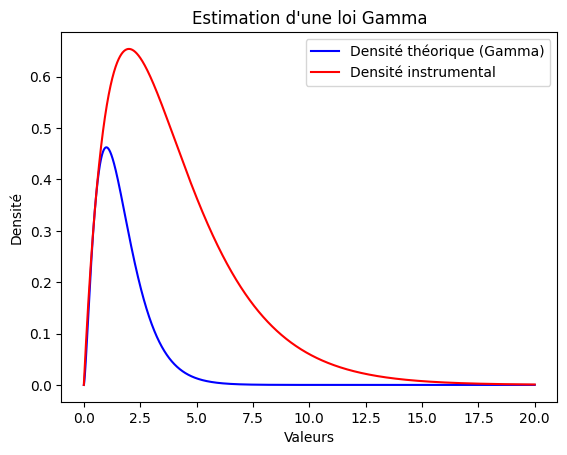

In [22]:
# Paramètres de la loi bêta
alpha = 2.5
beta_val = 1.5

x = np.linspace(0, 20, 10000) 

theoretical_density_gamma = gamma.pdf(x,alpha, scale= 1/beta_val)

mean, std_dev = 0.5, 0.3
instru_density = gamma.pdf(x, math.floor(alpha),scale = 1/(beta_val-1))

x_opt = alpha - math.floor(alpha) # cf pièce jointe
M = gamma.pdf(x_opt, alpha,scale = 1/beta_val)/gamma.pdf(x_opt, math.floor(alpha), scale= 1/(beta_val-1))

# Tracé de la densité théorique de la loi Gamma et de la loi instrumental
plt.plot(x, theoretical_density_gamma, color='blue', label='Densité théorique (Gamma)')
plt.plot(x, M*instru_density, color='red', label='Densité instrumental')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.title('Estimation d\'une loi Gamma')
plt.legend()
plt.show()


In [14]:
N = 10000

# Algorithme d'acceptation-rejet
accepted_samples = []
n_tot = 0
n_accepted = 0
while n_accepted < (N):
    # Étape 1: Générer un échantillon x0 à partir de la distribution auxiliaire q(x)
    x0 = np.random.gamma( math.floor(alpha), scale = 1/(beta_val-1))
    # Étape 2: Générer un échantillon u à partir d'une distribution uniforme [0, M * q(x0)]
    u = np.random.uniform(0, M * gamma.pdf(x0, math.floor(alpha),scale = 1/(beta_val-1)))

    # Étape 3: Vérifier si u < p˜(x0)
    if u < gamma.pdf(x0,alpha,scale = 1/beta_val):
        # Étape 4: Accepter l'échantillon x0
        accepted_samples.append(x0)
        n_accepted += 1
    n_tot += 1

print(f'Proportion de sample acceptés: {np.round(n_accepted/n_tot*100, 2)} %')
print(f'Proportion empirique de sample acceptés: {np.round(1/M*100,2)} %')

Proportion de sample acceptés: 28.32 %
Proportion empirique de sample acceptés: 28.12 %


**Q3 - Gaussienne tronquée**. On souhaite maintenant obtenir des échantillons d'une loi gaussienne tronquée, i.e., une loi normale restreinte à un certain intervalle (en 1D), ou un certain pavé de l'espace (pour le cas multivarié).

On considère le cas d'une gaussienne multivariée $\mathcal{N}(0, I_d)$ que l'on tronque sur le pavé $[-1,2]^d$. On prendra comme loi instrumentale la loi $\mathcal{N}(0, I_d)$ (i.e., non tronquée)

* Justifier ce choix de loi instrumentale.
* Pour le cas univarié ($d=1$), calculer numériquement la probabilité d'acceptation de l'algorithme acceptation-rejet. On pourra utiliser $\texttt{scipy.stats.cdf}$.
* Que devient cette probabilité pour $d=10$ ? $d=100$ ? Conclure quant à la faiblesse fondamentale de l'algorithme acceptation-rejet.

In [25]:
N = 10000

# Algorithme d'acceptation-rejet
accepted_samples = []
n_tot = 0
n_accepted = 0
while n_accepted < (N):
    # Étape 1: Générer un échantillon x0 à partir de la distribution auxiliaire q(x)
    x0 = np.random.normal(0, 1)
    M = 1
    # Étape 2: Générer un échantillon u à partir d'une distribution uniforme [0, M * q(x0)]
    u = np.random.uniform(0, M * norm.pdf(x0, 0, 1))

    # Étape 3: Vérifier si u < p˜(x0) sachant que p˜(x0) null en dehors de [-1,2]
    if u < norm.pdf(x0, 0, 1) and -1<=x0<=2:
        # Étape 4: Accepter l'échantillon x0
        accepted_samples.append(x0)
        n_accepted += 1
    n_tot += 1

print(f'Proportion de sample acceptés: {np.round(n_accepted/n_tot*100,2)} %')

Proportion de sample acceptés: 82.05 %


In [37]:
N = 10000

# Algorithme d'acceptation-rejet
accepted_samples = []
n_tot = 0
n_accepted = 0

d = 10
mean = np.zeros(d)
std = np.eye(d)

while n_accepted < (N):
    # Étape 1: Générer un échantillon x0 à partir de la distribution auxiliaire q(x)
    x0 = np.random.multivariate_normal(mean, std)
    M = 1
    # Étape 2: Générer un échantillon u à partir d'une distribution uniforme [0, M * q(x0)]
    u = np.random.uniform(0, M * multivariate_normal.pdf(x0, mean, std))

    # Étape 3: Vérifier si u < p˜(x0) sachant que p˜(x0) null en dehors de [-1,2]x...x[-1,2]
    if u < multivariate_normal.pdf(x0, mean, std) and -1<=min(x0) and max(x0)<=2:
        # Étape 4: Accepter l'échantillon x0
        accepted_samples.append(x0)
        n_accepted += 1
    n_tot += 1

print(f'Proportion de sample acceptés: {np.round(n_accepted/n_tot*100,2)} %')

Proportion de sample acceptés: 13.65 %


In [44]:
N = 10000

# Algorithme d'acceptation-rejet
accepted_samples = []
n_tot = 0
n_accepted = 0

d = 20 # Pour d = 100 l'algorithme prenanit beaucoup trop de temps à run
mean = np.zeros(d)
std = np.eye(d)

while n_accepted < (N):
    # Étape 1: Générer un échantillon x0 à partir de la distribution auxiliaire q(x)
    x0 = np.random.multivariate_normal(mean, std)
    M = 1
    # Étape 2: Générer un échantillon u à partir d'une distribution uniforme [0, M * q(x0)]
    u = np.random.uniform(0, M * multivariate_normal.pdf(x0, mean, std))

    # Étape 3: Vérifier si u < p˜(x0) sachant que p˜(x0) null en dehors de [-1,2]x...x[-1,2]
    if u < multivariate_normal.pdf(x0, mean, std) and -1<=min(x0) and max(x0)<=2:
        # Étape 4: Accepter l'échantillon x0
        accepted_samples.append(x0)
        n_accepted += 1
    n_tot += 1

print(f'Proportion de sample acceptés: {np.round(n_accepted/n_tot*100,2)} %')

Proportion de sample acceptés: 1.82 %


La loi normal non tronqué colle parfaitement la loi normal sur son ensemble de définition. Donc est idéal comme loi instrumentale.

Faiblesse de l'algorithme de rejet:
À mesure que la dimension augmente, la probabilité d'acceptation dans l'algorithme d'acceptation-rejet diminue. Cela est dû à l'augmentation de la dimension de l'espace sur lequel la loi doit être restreinte. L'espace où les échantillons peuvent être acceptés devient de plus en plus petit par rapport à l'espace total.

## Partie 2 - Estimation de $\pi$ par Monte Carlo

On rappelle que $\pi$ est égal à la surface d'un cercle de rayon 1, i.e.
$$ \pi = \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) dx dy.$$

Ce qui peut se réécrire comme
$$ \pi = 4 \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) p(x) p(y) dx dy.$$
Où $p(x)$ et $p(y)$ sont les densités de la loi uniforme sur $[-1,1]$.

* En déduire l'esimtateur de Monte Carlo de $\pi$.
* Représenter l'évolution de la valeur de l'estimation par Monte Carlo de $\pi$ en fonction du nombre d'échantillons (aller jusqu'à 10000). Quel résultat mathématique fondamental est-on en train d'illustrer ?
* (Bonus) - Faire 100 simulations de l'estimation par Monte Carlo de $\pi$ avec $N = 1000$ échantillons, et vérifier le résultat de convergence en loi de l'estimateur MC donné par le TCL.

In [6]:
N = 10000
X = []
Y = []
res = 0
I_list = []
x_values = []
for i in range (1,N+1):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    h_value = x**2 + y**2
    if h_value <= 1:
        res += 1

    if i%20 == 0:
        I_list.append(4*res/(i))
        x_values.append(i)

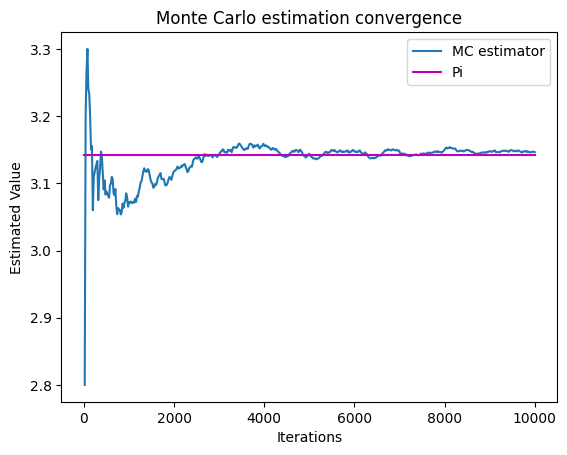

In [8]:
plt.plot(x_values, I_list, label = 'MC estimator')
plt.plot([0,N],[np.pi,np.pi],color='m', label='Pi')
plt.xlabel('Iterations')
plt.ylabel('Estimated Value')
plt.title('Monte Carlo estimation convergence')
plt.legend()
plt.show()

D'après la formule l'estimateur de Monte Carlo est donné par $$ I = 4/Ns \sum_{i=1}^{Ns} h(x_i,y_i)$$ où $x_i \sim U([-1,1]) \quad \text{et} \quad y_i \sim U([-1,1])$ et $h(x_i,y_i) = \mathbb{1}_{x_i^2 + y_i^2 \leq 1}(x_i,y_i)$

On illustre le théorème Centrale Limite qui assure la convergence de l'estimateur de Monte Carlo

In [99]:
N = 1000
estimates = []

# 100 simulations
for _ in range(100):
    X = []
    Y = []
    res = 0

    for i in range (1,N+1):
        x = np.random.uniform(-1,1)
        y = np.random.uniform(-1,1)
        h_value = x**2 + y**2
        if h_value <= 1:
            res += 1

    estimate = 4*res/N
    estimates.append(estimate)

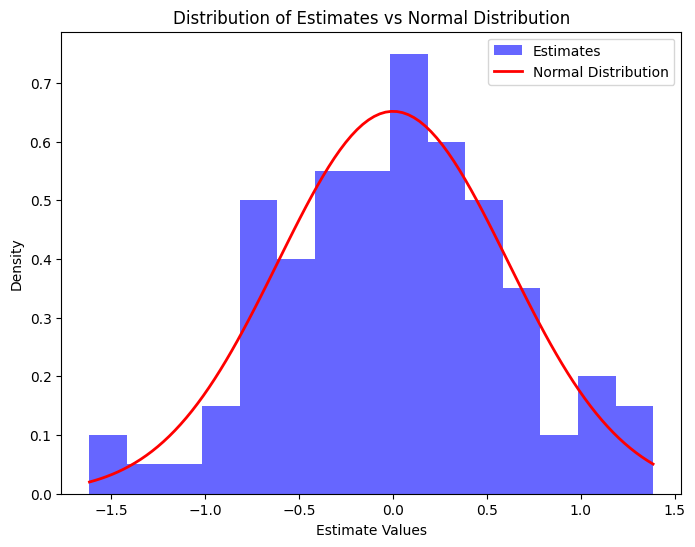

In [101]:
estimates_standardised = list(map(lambda x: np.sqrt(100) * (x - np.pi), estimates))

# Plotting histogram of estimates
plt.figure(figsize=(8, 6))
plt.hist(estimates_standardised, bins=15, density=True, alpha=0.6, color='blue', label='Estimates')

# Computing mean and standard deviation of estimates
mean = 0
std = np.std(estimates_standardised)

# Creating a normal distribution based on estimates' mean and standard deviation
x = np.linspace(np.min(estimates_standardised), np.max(estimates_standardised), 100)
theoretical_density = norm.pdf(x, mean, std)
plt.plot(x, theoretical_density, 'r', linewidth=2, label='Normal Distribution')

plt.xlabel('Estimate Values')
plt.ylabel('Density')
plt.title('Distribution of Estimates vs Normal Distribution')
plt.legend()
plt.show()

En superposant la densité théorique d'une loi normale centrée de variance var(X,Y) estimé à partir de la variance de notre simulation, on constate que l'estimateur MC converge bien vers une loi normale centrée de variance var(X,Y). 

### Partie 3 - Échantillonnage d'importance (*Importance sampling*)

On cherche à estimer $\mathbb{P}(X > 3)$ pour $X \sim \mathcal{N}(0,1)$.

* Ré-écrire cette probabilité comme une intégrale et en déduire l'estimateur de Monte Carlo "standard"
* Simuler $100$ fois $N = 10000$ échantillons, et donner la moyenne et la variance empiriques de l'estimateur de Monte Carlo standard
* On souhaite maintenant implémenter un schéma d'échantillonnage d'importance en utilisant comme loi instrumentale $\mathcal{N}(4,1)$. Donner l'estimateur de Monte Carlo associé.
* De même, simuler $100$ fois $N = 10000$ échantillons, et donner la moyenne et la variance empiriques de de deuxième estimateur.
* Quantifier la réduction de variance. Pouvait-on s'attendre à ce résultat ?

$$ \mathbb{P}(X > 3) = \int_{-\infty}^{+\infty} \mathbb{1}_{x > 3}(x) p(x)dx.$$
avec $p(x)$ densité d'une loi $\mathcal{N}(0, 1)$ 
d'où $$ I_{\text{MC}} = 1/Ns \sum_{i=1}^{Ns} h(x_i)$$ où $ x_i $ issue d'une loi $ \mathcal{N}(0, 1)$ et $h(x_i) = \mathbb{1}_{x_i > 3}(x_i)$


In [115]:
N = 10000

estimates= []
for _ in range(100):
    X = []
    res = 0

    for i in range (0,N):
        x = np.random.normal(0,1)
        if x > 3:
            res += 1

    estimate = res/N
    estimates.append(estimate)

In [116]:
print(f"Moyenne empirique de l'estimateur MC : {np.mean(estimates)}")
print(f"Variance empirique de l'estimateur MC : {np.std(estimates)**2}")

Moyenne empirique de l'estimateur MC : 0.0013360000000000002
Variance empirique de l'estimateur MC : 9.8504e-08


L'estimateur par importance sampling est le suivant :
$$ I_{\text{MC}} = 1/Ns \sum_{i=1}^{Ns} h(x_i)$$ 
où $ x_i $ issue d'une loi $ \mathcal{N}(4, 1)$ et $h(x_i) = \mathbb{1}_{x_i > 3}(x_i)*exp(-(4x_i - 8))$
(Calcul en pièce jointe)

In [117]:
N = 10000

new_estimates= []
for _ in range(100):
    X = []
    res = 0

    for i in range (0,N):
        x = np.random.normal(4,1)
        if x > 3:
            res += np.exp(-4*x+8)

    estimate = res/N
    new_estimates.append(estimate)

In [122]:
print(f"Moyenne empirique de l'estimateur MC par importance sampling: {np.mean(new_estimates)}")
print(f"Variance empirique de l'estimateur MC par importance sampling : {np.std(new_estimates)**2}")
print(f"On observe une réduction de variance d'un facteur {np.round(np.std(estimates)/np.std(new_estimates),2)}")

Moyenne empirique de l'estimateur MC par importance sampling: 0.00134472558712538
Variance empirique de l'estimateur MC par importance sampling : 9.782405335115072e-10
On observe une réduction de variance d'un facteur 10.03
